### This is the simple workflow with LangGraph

In [1]:
from langgraph.graph import Graph

## Assigning the Graph class to object
workflow1= Graph()

In [2]:
workflow1.__dict__

{'nodes': {},
 'edges': set(),
 'branches': defaultdict(dict, {}),
 'support_multiple_edges': False,
 'compiled': False}

In [3]:
def function1(input1):
    return input1 + ' from first function'

def function2(input2):
    return input2 + ' and mani from second function'

In [5]:
## Adding functions to workflow1 as node

workflow1.add_node('function1', function1)

workflow1.add_node('function2', function2)

In [6]:
## Adding the edges between functions

workflow1.add_edge('function1', 'function2')

In [7]:
## Setting the entry point, end point of graph

workflow1.set_entry_point('function1')

workflow1.set_finish_point('function2')

In [8]:
##  workflow1 is ready to compile

app1= workflow1.compile()

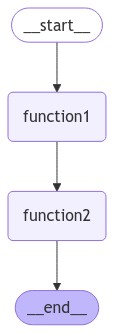

In [9]:
## Visualize the workflow chart

from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [10]:
## Executing the workflow1

app1.invoke('Hi!, this is Malathy')

'Hi!, this is Malathy from first function and mani from second function'

In [11]:
## Checking the execuation of each functions

input= 'Hi! this is Malathy'

for output in app1.stream(input):
    for key, value in output.items():
        print(f'here is the output from {key}')
        print('-------------')
        print(value)
        print('\n')
        

here is the output from function1
-------------
Hi! this is Malathy from first function


here is the output from function2
-------------
Hi! this is Malathy from first function and mani from second function




### It's a Workflow with LLM

In [21]:
# Intializing the Gemini LLM

from langchain_google_genai import GoogleGenerativeAIEmbeddings, ChatGoogleGenerativeAI

embedding= GoogleGenerativeAIEmbeddings(model= 'models/embedding-001')
llm= ChatGoogleGenerativeAI(model='gemini-1.0-pro')

llm.invoke('Hello').content

'Hello there! How can I assist you today?'

In [28]:
def function1(input):
    llm= ChatGoogleGenerativeAI(model='gemini-1.0-pro')
    response= llm.invoke(input).content
    return response

In [29]:
def function2(input):
    upper_case= input.upper()
    return upper_case

In [30]:
from langgraph.graph import Graph

workflow3=Graph()

# Adding the fucntion as node
workflow3.add_node('llm', function1)
workflow3.add_node('function', function2)

# Adding the edge between function
workflow3.add_edge('llm','function')

# Setting the entry and finish point of graph
workflow3.set_entry_point('llm')
workflow3.set_finish_point('function')

# complie the workflow3
app2= workflow3.compile()

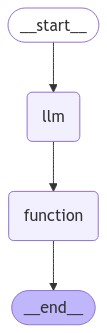

In [31]:
from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [32]:
app2.invoke('who is the first chief minsiter of Tamil Nadu')

'C. RAJAGOPALACHARI'

In [33]:
print(app2.invoke('who is LTTE prabhakaran'))

**VELUPILLAI PRABHAKARAN** (NOVEMBER 26, 1954 – MAY 18, 2009) WAS THE LEADER OF THE LIBERATION TIGERS OF TAMIL EELAM (LTTE), A MILITANT SEPARATIST ORGANIZATION THAT FOUGHT FOR THE INDEPENDENCE OF A TAMIL STATE IN NORTHERN AND EASTERN SRI LANKA.

**EARLY LIFE AND EDUCATION:**

* BORN IN VELVETTITURAI, JAFFNA, SRI LANKA, TO A POOR TAMIL FAMILY.
* STUDIED AT JAFFNA HINDU COLLEGE.
* BECAME INTERESTED IN TAMIL NATIONALISM AT A YOUNG AGE.

**FORMATION OF THE LTTE:**

* IN 1972, CO-FOUNDED THE TAMIL NEW TIGERS, WHICH LATER BECAME THE LTTE.
* THE LTTE AIMED TO ESTABLISH A SEPARATE TAMIL STATE CALLED TAMIL EELAM.

**TAMIL INSURGENCY:**

* LED THE LTTE IN A BLOODY INSURGENCY AGAINST THE SRI LANKAN GOVERNMENT FROM 1983 TO 2009.
* USED GUERRILLA WARFARE TACTICS, INCLUDING SUICIDE BOMBINGS AND CHILD SOLDIERS.

**PEACE PROCESS:**

* IN 2002, A CEASEFIRE AGREEMENT WAS SIGNED BETWEEN THE LTTE AND THE GOVERNMENT.
* HOWEVER, PEACE TALKS COLLAPSED IN 2006, AND THE INSURGENCY RESUMED.

**FINAL BATTLE:**



In [34]:
input= 'who is the first chief minsiter of tamil nadu'

for output in app2.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm
_______
C. Rajagopalachari


here is output from function
_______
C. RAJAGOPALACHARI




### Here lets create our own output token counter

In [35]:
def token_counter(input):
    text=input.split()
    count=len(text)
    return (f"Total token number is {count}")
    

In [36]:
def llm(input):
    llm= ChatGoogleGenerativeAI(model='gemini-1.0-pro')
    response= llm.invoke(input).content
    return response

In [38]:
from langgraph.graph import Graph

workflow3=Graph()

# Adding the fucntion as node
workflow3.add_node('llm', llm)
workflow3.add_node('token_counter', token_counter)

# Adding the edge between function
workflow3.add_edge('llm','token_counter')

# Setting the entry and finish point of graph
workflow3.set_entry_point('llm')
workflow3.set_finish_point('token_counter')

# complie the workflow3
app3= workflow3.compile()

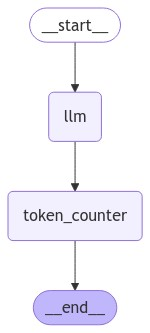

In [39]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [40]:
app3.invoke('who is the first prime minsiter of India?')

'Total token number is 2'

In [41]:
input= 'who is the first prime minsiter of India'

for output in app3.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm
_______
Jawaharlal Nehru


here is output from token_counter
_______
Total token number is 2


